## Introduction
This notebook serves delves into an analysis of a dataset comprising data science jobs, which has been sourced from Glassdoor. The report employs the use of Python libraries, including pandas for data manipulation, matplotlib for data visualization, and seaborn for statistical data visualization. The structure of the notebook is organized into distinct sections, each dedicated to addressing a unique question or theme related to the job data. Within each section, Python code is utilized to import and process the job data, followed by a visualization that provides a graphical representation of the answer. Accompanying these visualizations are commentaries and interpretations of the results, offering readers a deeper understanding of the findings. This notebook is particularly beneficial for individuals interested in gaining insights into the current landscape of the data science job market1. It provides a valuable resource for understanding trends, patterns, and key characteristics of data science roles in the industry.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv(r'Uncleaned_DS_jobs.csv')
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [12]:
def job_simplify(title):
    if 'Machine Learning' in title:
        return 'Machine Learning'
    elif 'Analyst' in title:
        return 'Analyst'
    elif 'Data Scientist' in title:
        return 'Data Scientist'
    elif 'Data Engineer' in title:
        return 'Data Engineer'
    elif 'Director' in title:
        return 'Director'
    elif 'Manager' in title:
        return 'Manager'
    else:
        return None
    

df['Job_Simplified'] = df['Job Title'].apply(job_simplify)
df['Job_Simplified']

0      Data Scientist
1      Data Scientist
2      Data Scientist
3      Data Scientist
4      Data Scientist
            ...      
667    Data Scientist
668    Data Scientist
669    Data Scientist
670    Data Scientist
671    Data Scientist
Name: Job_Simplified, Length: 672, dtype: object

Convert the salary column into integers.

In [26]:
import re

def extract_salary_range(string):
    pattern = r'\$(\d+)K-\$(\d+)K'
    match = re.search(pattern,string)
    return f'{match.group(1)}-{match.group(2)}'

df['Salary Estimate'] = df['Salary Estimate'].apply(extract_salary_range)
df['Salary Estimate']


0      137-171
1      137-171
2      137-171
3      137-171
4      137-171
        ...   
667    105-167
668    105-167
669    105-167
670    105-167
671    105-167
Name: Salary Estimate, Length: 672, dtype: object

Remove the numbers from the company name.

In [43]:
df['Company Name'] = df['Company Name'].str.split('\n', expand=True)[0]
df['Company Name']


0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object

In [44]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Simplified
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Data Scientist
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist


Calculate the age of the company

In [64]:
df['Founded'] = pd.to_datetime(df['Founded'], format='%Y', errors='coerce')
df['Founded']


0     1993-01-01
1     1968-01-01
2     1981-01-01
3     2000-01-01
4     1998-01-01
         ...    
667   1989-01-01
668          NaT
669          NaT
670          NaT
671   1976-01-01
Name: Founded, Length: 672, dtype: datetime64[ns]

In [75]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def company_age(year):
    try:
        return relativedelta(datetime.now(), year).years
    except:
        return None    

df['Company_Age'] = df['Founded'].apply(company_age)
df['Company_Age']

0      30.0
1      55.0
2      42.0
3      23.0
4      25.0
       ... 
667    34.0
668     NaN
669     NaN
670     NaN
671    47.0
Name: Company_Age, Length: 672, dtype: float64

Check whether the working location is the same state as the headquarter

In [83]:
df['Same_State'] = df['Location'].str.split(',',expand=True)[1] == df['Headquarters'].str.split(',',expand=True)[1]
df['Same_State']

0       True
1       True
2       True
3      False
4       True
       ...  
667     True
668    False
669    False
670    False
671     True
Name: Same_State, Length: 672, dtype: bool

Found out the average salary of the job for visualization

In [101]:
def average_salary(string):
    pattern = r'(\d+)-(\d+)'
    
    try:
        match = re.search(pattern,string)
        return (int(match.group(1))+int(match.group(2)))*0.5
    except:
        return 0

df['Salary_Average'] = df['Salary Estimate'].apply(average_salary)
df['Salary_Average']


0      154.0
1      154.0
2      154.0
3      154.0
4      154.0
       ...  
667    136.0
668      0.0
669      0.0
670      0.0
671    136.0
Name: Salary_Average, Length: 672, dtype: float64

The average salary distribution is skewed to the right, with most jobs paying between 100K and 150K.

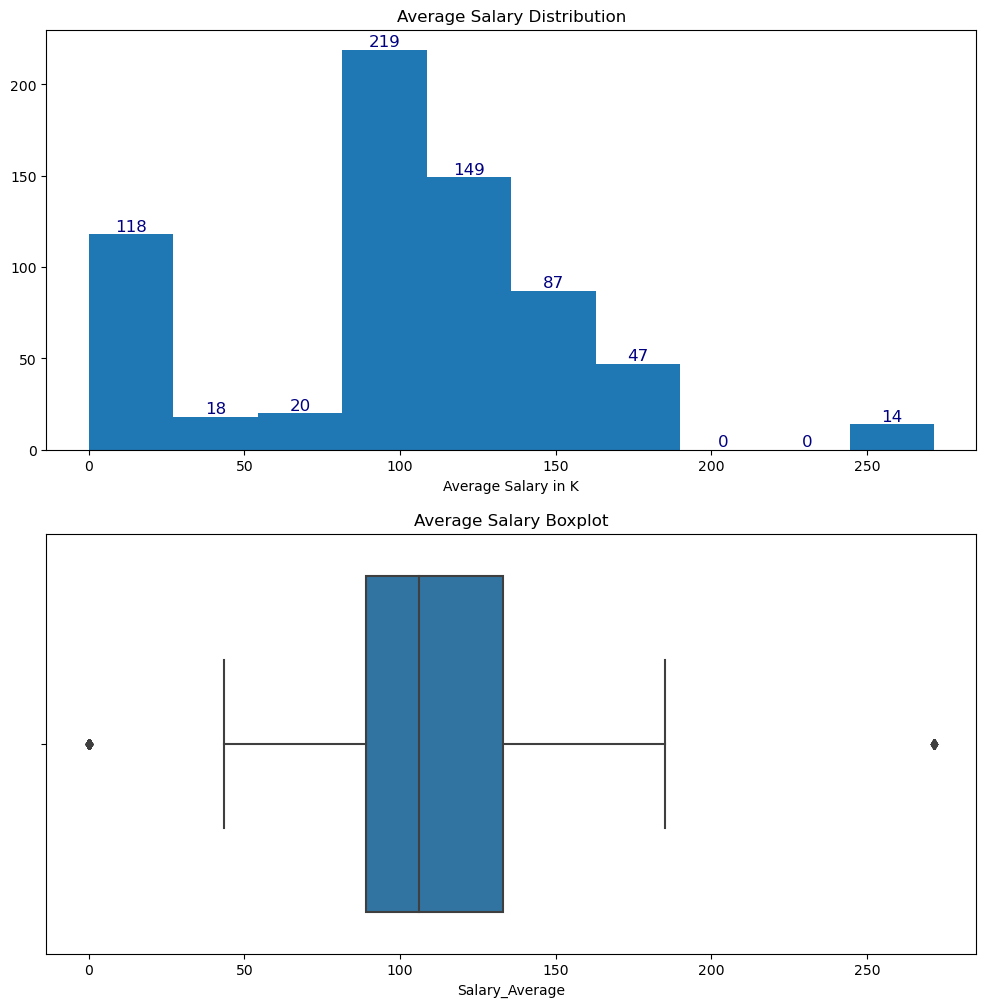

In [5]:
fig, axes = plt.subplots(2, figsize=(12,12))

values, bins, bars = axes[0].hist(x='Salary_Average', bins=10, data=df)
axes[0].bar_label(bars, fontsize=12, color='navy')
axes[0].set_title('Average Salary Distribution')
axes[0].set_xlabel('Average Salary in K')

axes[1].set_title('Average Salary Boxplot')
sns.boxplot(x=df['Salary_Average'], ax=axes[1]);

There is no clear relationship between company age and average salary or rating.
The rating distribution is approximately normal, with most jobs having a rating between 3.0 and 4.0.

Text(0.5, 0, 'Company Age')

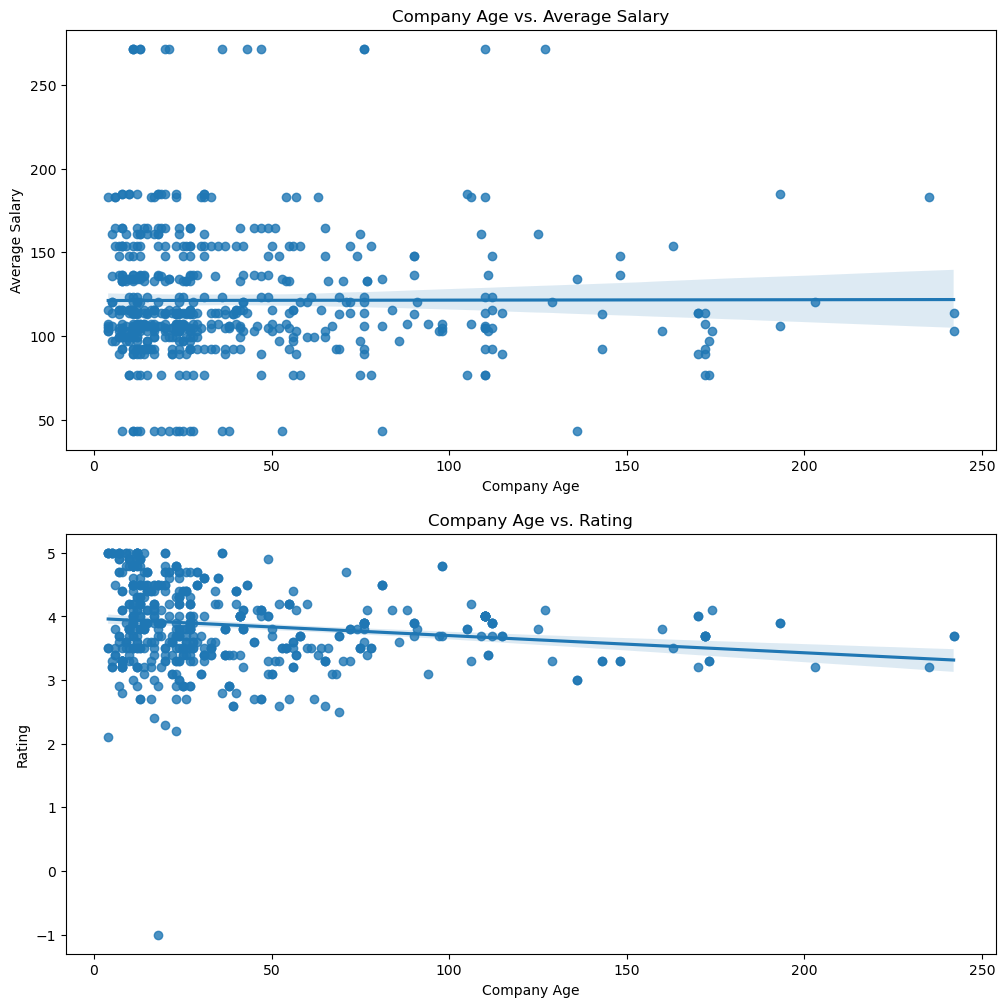

In [6]:
fig, axes = plt.subplots(2, figsize=(12,12))
sns.regplot(data=df, x='Company_Age', y='Salary_Average', ax=axes[0])
axes[0].set_title('Company Age vs. Average Salary')
axes[0].set_xlabel('Company Age')
axes[0].set_ylabel('Average Salary')
sns.regplot(data=df, x='Company_Age', y='Rating', ax=axes[1])
axes[1].set_title('Company Age vs. Rating')
axes[1].set_xlabel('Company Age')


We can see from the two bar charts below that most jobs are in the insurance industry and data scientists are the most demanded

Text(0.5, 0, 'Number of Job Opportunities')

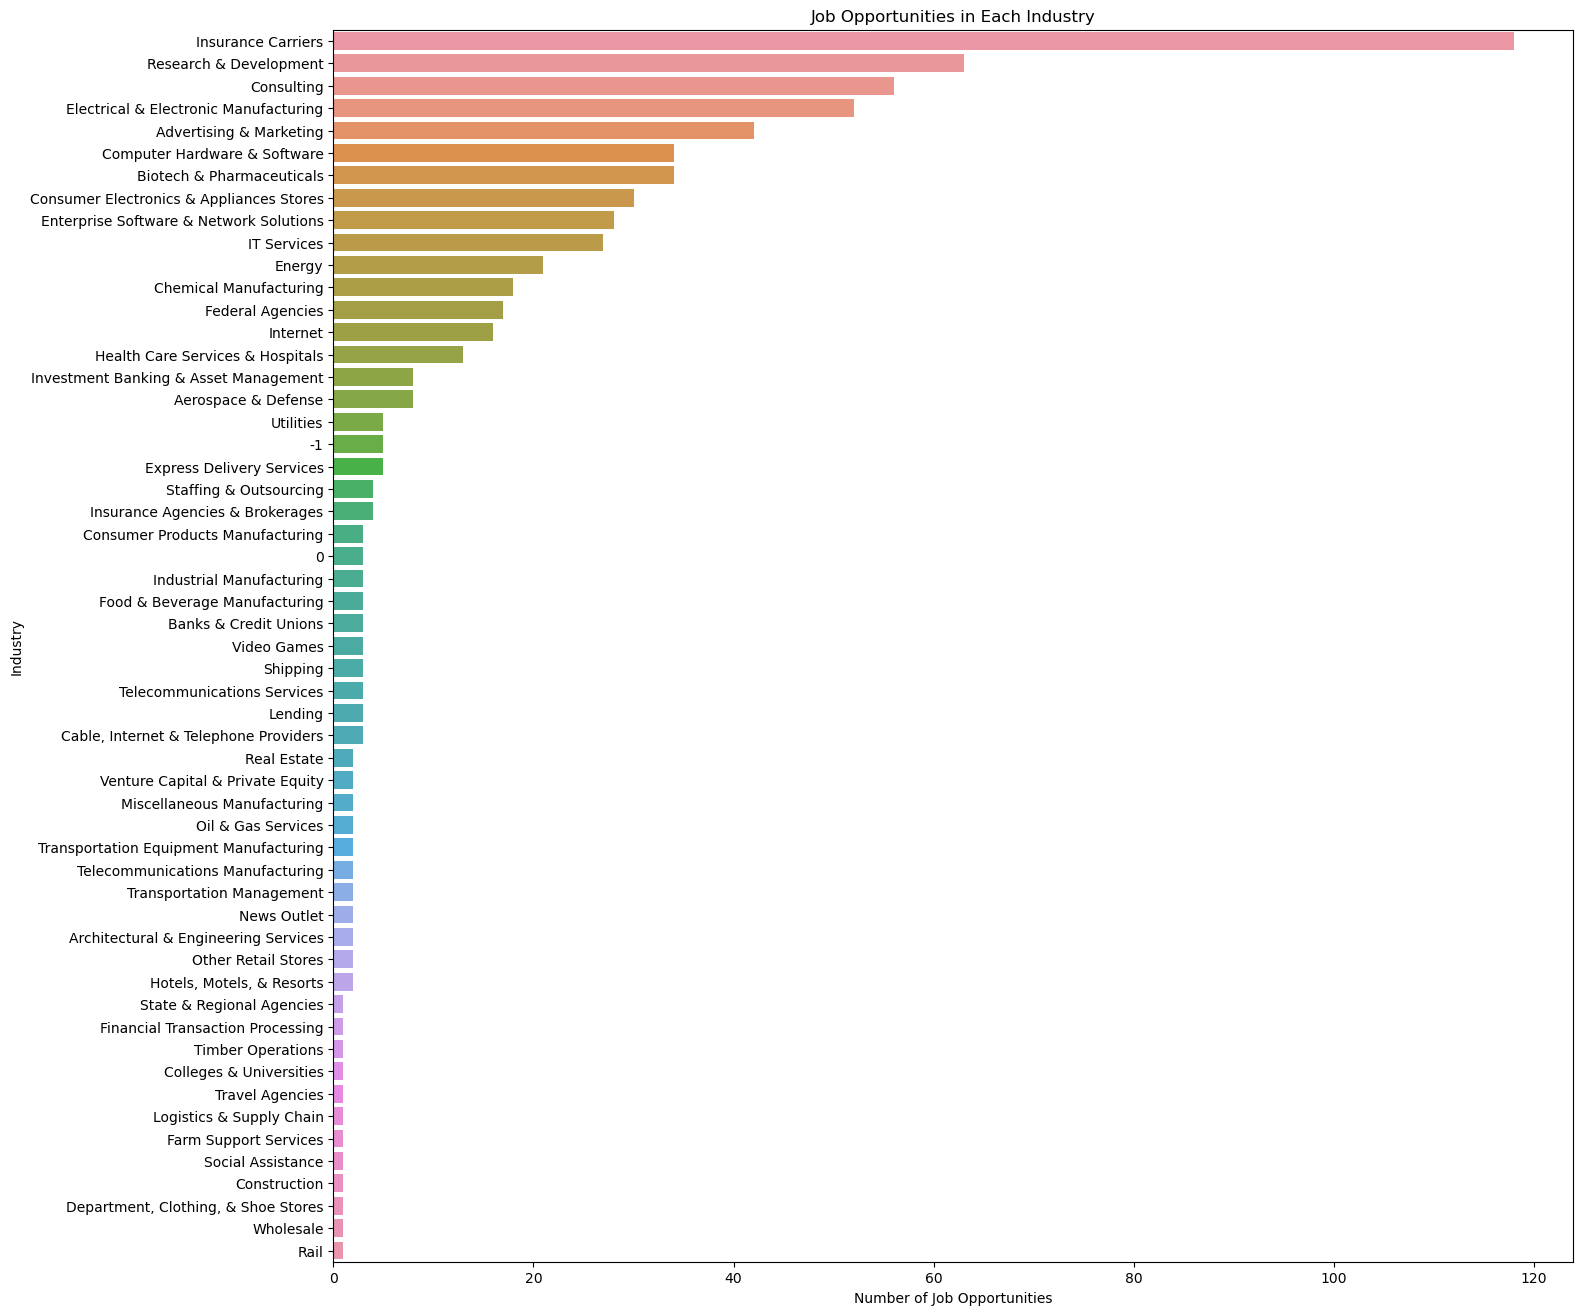

In [9]:
plt.subplots(figsize=(16,16))
sns.barplot(data=df, y=df['Industry'].unique(), x=df['Industry'].value_counts())
plt.title('Job Opportunities in Each Industry')
plt.ylabel('Industry')
plt.xlabel('Number of Job Opportunities')

Text(0.5, 0, 'Job Opportunities')

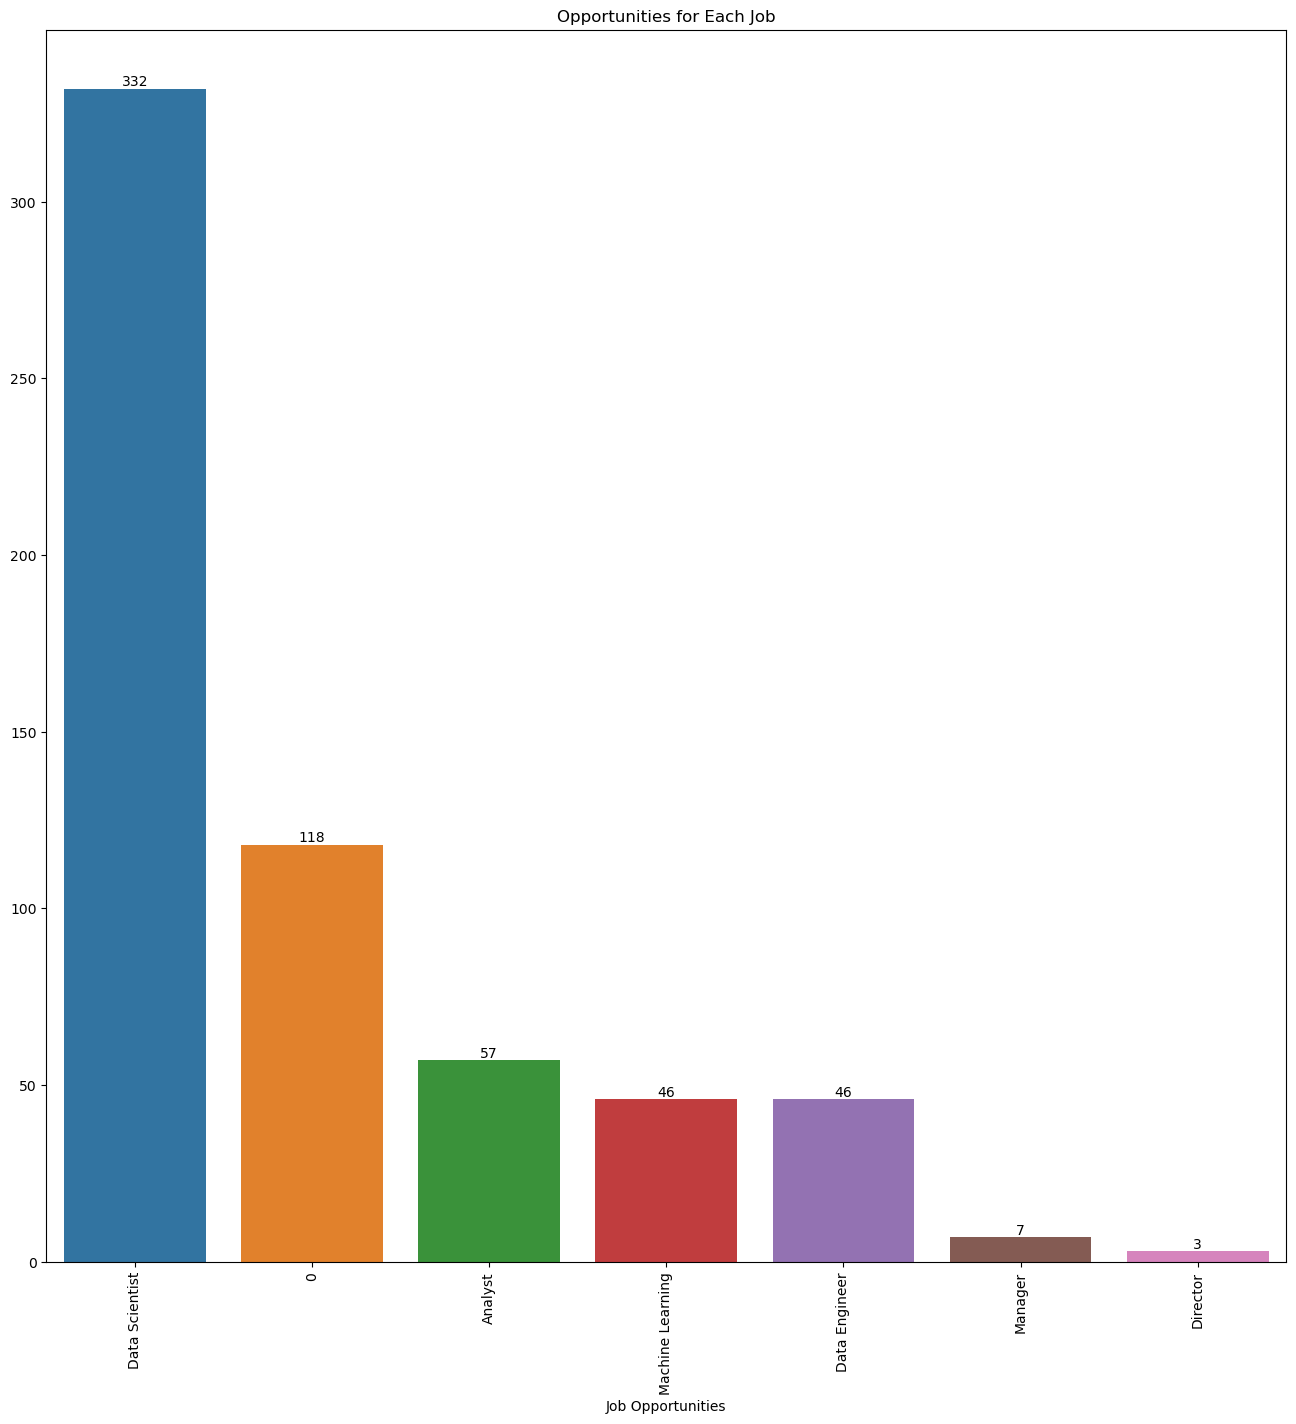

In [10]:
fig, ax = plt.subplots(figsize=(16,16))
sns.barplot(data=df, x=df[df['Job_Simplified'] != 0]['Job_Simplified'].value_counts().index, y=df[df['Job_Simplified'] != 0]['Job_Simplified'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0])
plt.title('Opportunities for Each Job')
plt.ylabel('')
plt.xlabel('Job Opportunities')

Non-technical positions, such as managers and directors, tend to have higher salaries but lower ratings than technical positions, such as data scientists and data engineers.

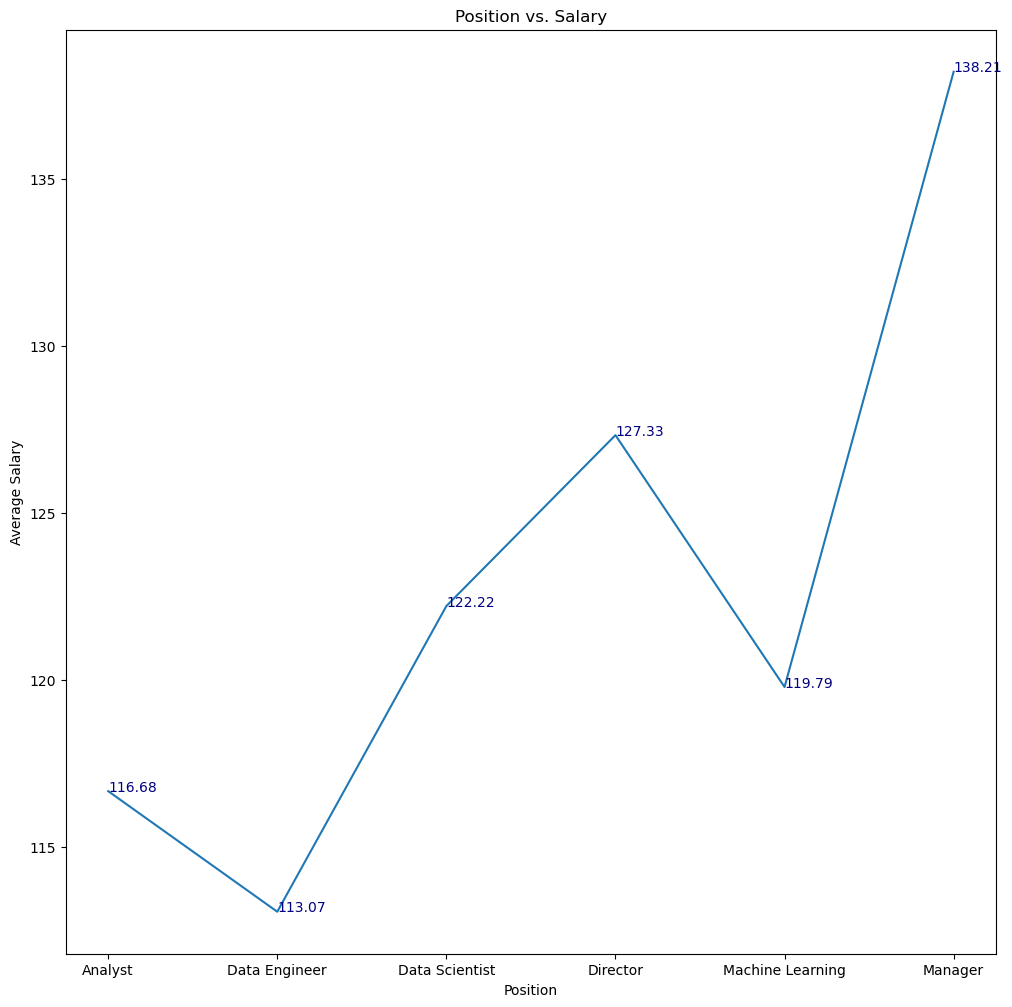

In [11]:
plt.subplots(figsize=(12,12))
job_avg_salary_df = df.groupby('Job_Simplified')['Salary_Average'].mean().reset_index()
job_avg_salary_df = job_avg_salary_df[job_avg_salary_df['Salary_Average'] != 0]
sns.lineplot(data=job_avg_salary_df, x='Job_Simplified', y='Salary_Average')
plt.title('Position vs. Salary')
plt.xlabel('Position')
plt.ylabel('Average Salary')
for x,y in zip(job_avg_salary_df['Job_Simplified'], job_avg_salary_df['Salary_Average']):
    plt.text(x = x, y = y, s = '{:.2f}'.format(y), color = 'Navy')

Text(0, 0.5, 'Average Rating')

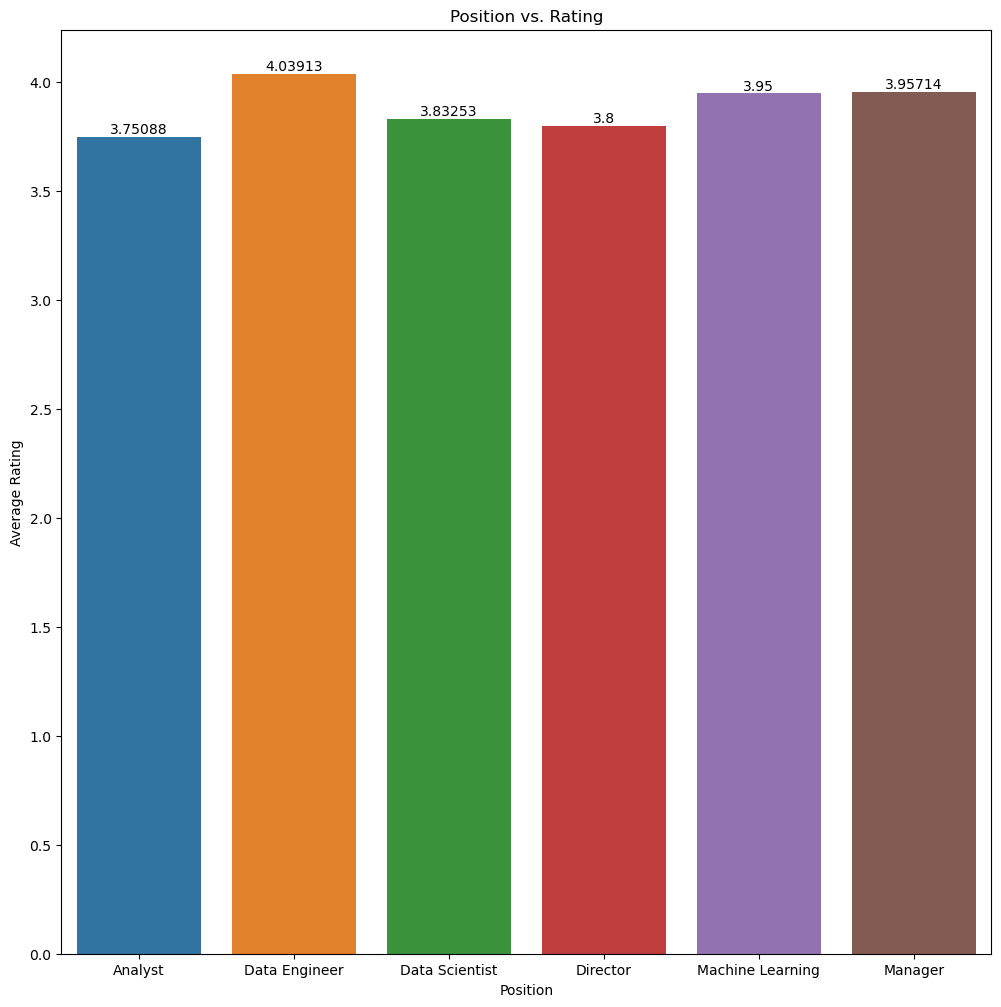

In [13]:
job_rating_df = df.groupby('Job_Simplified')['Rating'].mean().reset_index()
job_rating_df = job_rating_df[job_rating_df['Rating'] != 0]
plt.subplots(figsize=(12,12))
ax = sns.barplot(data=job_rating_df, x='Job_Simplified', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Position vs. Rating')
plt.xlabel('Position')
plt.ylabel('Average Rating')

Salary does not have clear relationship with rating.

Text(0, 0.5, 'Average Salary')

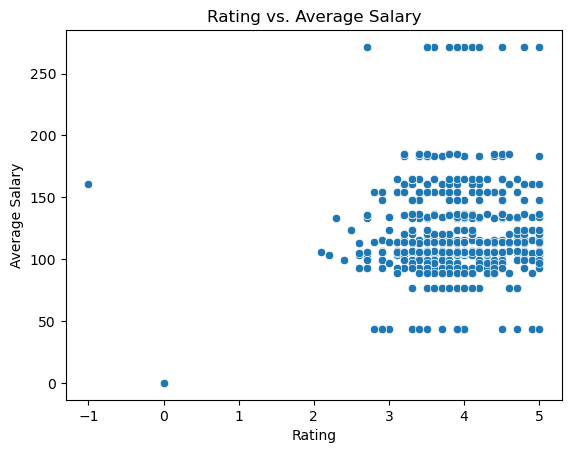

In [21]:
sns.scatterplot(data=df, x='Rating', y='Salary_Average')
plt.title('Rating vs. Average Salary')
plt.xlabel('Rating')
plt.ylabel('Average Salary')

Some locations, such as Pleasanton, CA and Wilmington, DE, tend to have higher salaries than other locations, such as New York, NY and San Francisco, CA.

Text(0, 0.5, 'Location')

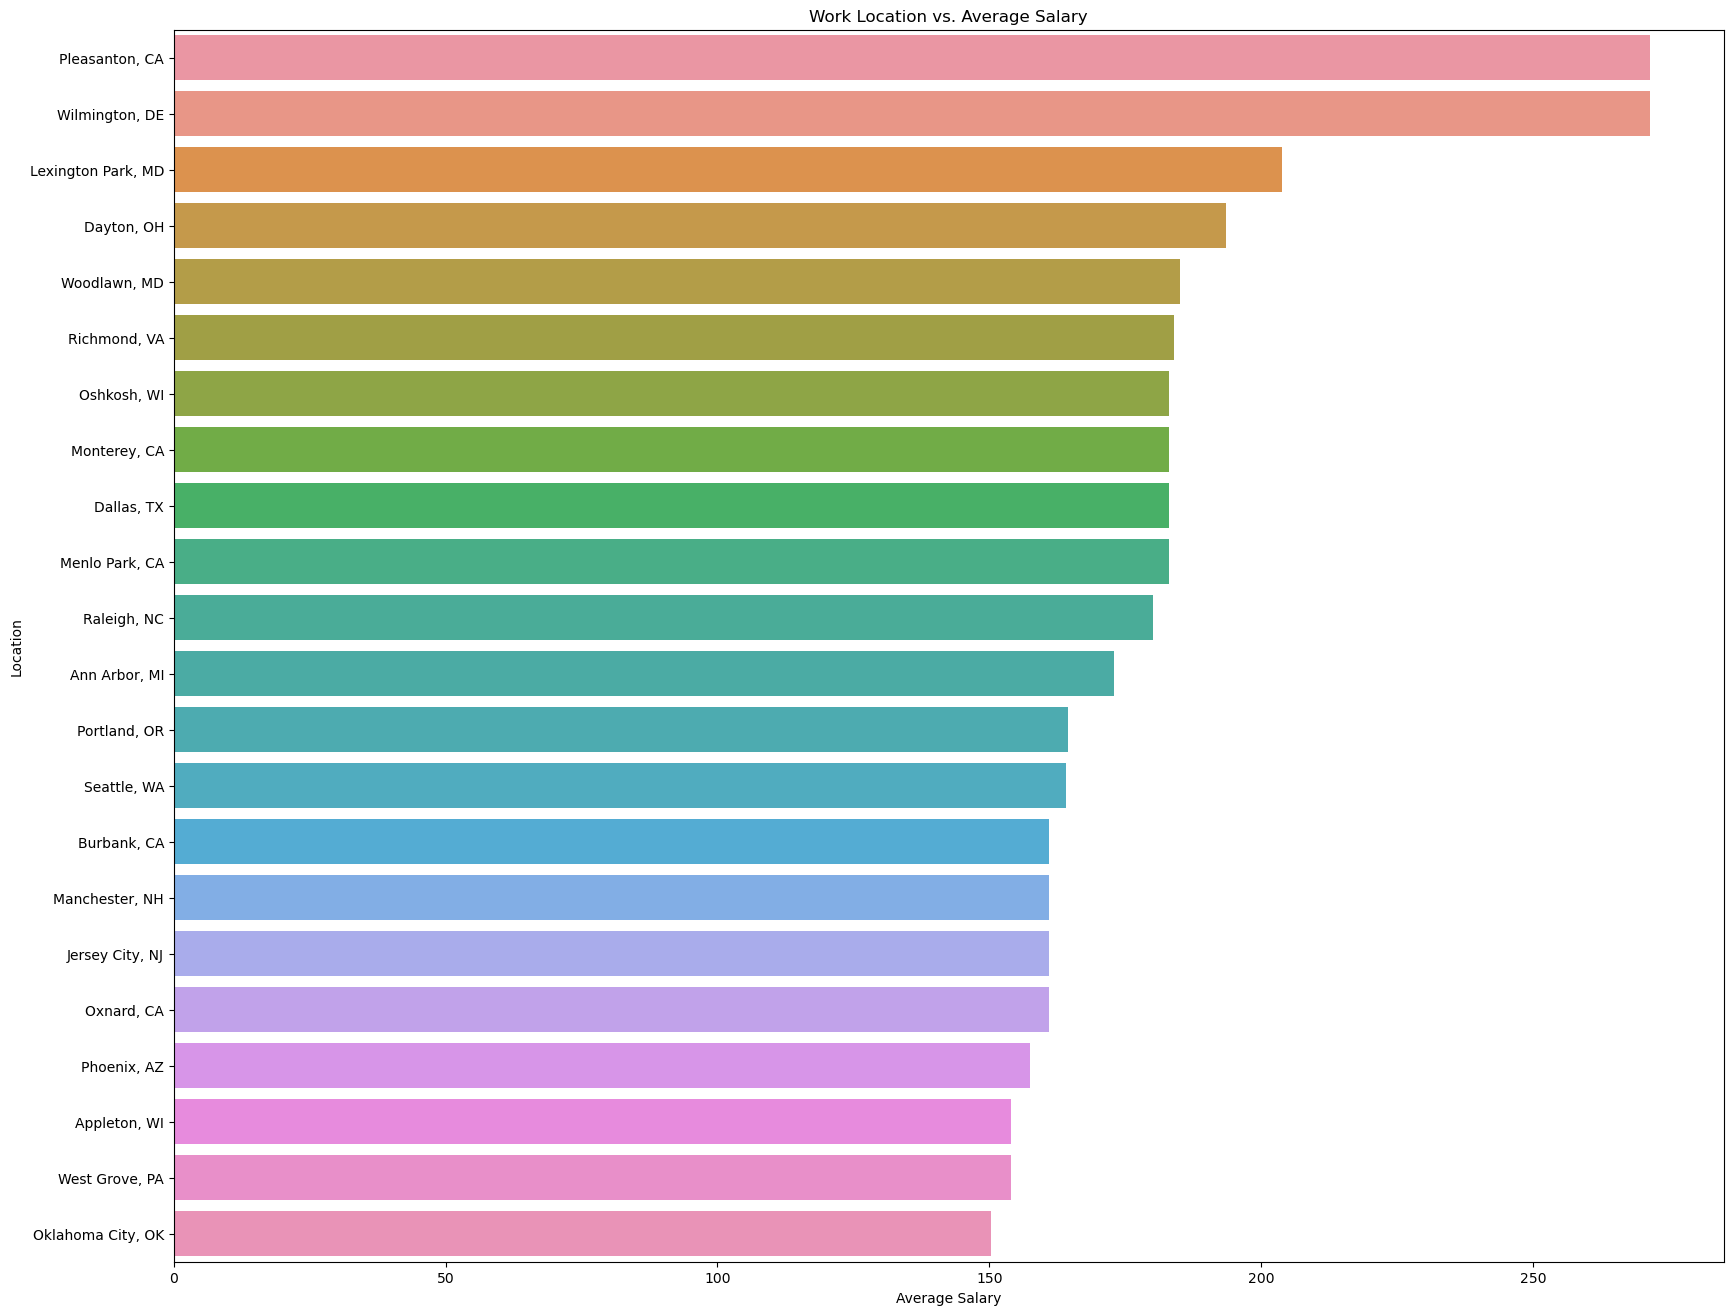

In [22]:
location_salary_df = df.groupby('Location')['Salary_Average'].mean().sort_values(ascending=False).reset_index()
location_salary_df = location_salary_df[location_salary_df['Salary_Average'] > 150]

plt.subplots(figsize=(20,16))
sns.barplot(data=location_salary_df, y='Location', x='Salary_Average')
plt.title('Work Location vs. Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Location')

In [189]:
df.to_csv(r'Glassdoor-DS-Job-Final.csv', header='column-names')

## Inference
1. The average salary distribution is **skewed to the right**, with most jobs paying between **100K** and **150K**. The median salary is around **130K**, while the maximum salary is around **200K**.
2. The rating distribution is **approximately normal**, with most jobs having a rating between **3.0 and 4.0**. The mean rating is around 3.6, while the minimum rating is -1.0, which indicates missing values.
6. There is no clear relationship between company age and average salary. However, there seems to be a slight negative correlation between company age and rating, indicating that older companies tend to have lower ratings than newer companies.
7. There is also no clear relationship between rating and average salary. However, there seems to be some outliers with high ratings and low salaries or low ratings and high salaries.
8. There is a clear relationship between job title and average salary. Non-technical positions, such as managers and directors, tend to have higher salaries than technical positions, such as data scientists and data engineers. However, non-technical positions also tend to have lower ratings than technical positions.
9. There is also a clear relationship between location and average salary. Some locations, such as Pleasanton, CA and Wilmington, DE, tend to have higher salaries than other locations, such as New York, NY and San Francisco, CA. This may be due to differences in cost of living or demand for data science jobs in different regions.

## Conclusion
In conclusion, this analysis provides valuable insights into the data science job market. It highlights the factors that influence salary and rating and can help job seekers make informed decisions.